In [1]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

In [2]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
week_nums = [210605, 210612 ,210619, 210626, 210703,210710,210717,210724,210731,210807,210814,210821,210828]
turnstiles_data = get_data(week_nums)

In [3]:
turnstiles_data["DATETIME"] = pd.to_datetime(turnstiles_data.DATE + " " + turnstiles_data.TIME, 
                                            format="%m/%d/%Y %H:%M:%S") 

In [4]:
turnstiles_data['DATE'] = pd.to_datetime(turnstiles_data['DATE'])
turnstiles_data['DayOfWeek'] = turnstiles_data['DATE'].dt.day_name()

In [5]:
turnstiles_data.columns = [column.strip() for column in turnstiles_data.columns]
turnstiles_data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATETIME', 'DayOfWeek'],
      dtype='object')

In [6]:
turnstiles_data.sample(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DayOfWeek
10746,A055,R227,00-00-04,RECTOR ST,NRW,BMT,2021-06-29,12:00:00,REGULAR,4727696,2122468,2021-06-29 12:00:00,Tuesday
65237,N102,R127,01-06-01,JAY ST-METROTEC,ACF,IND,2021-07-17,16:00:00,REGULAR,38170,23652,2021-07-17 16:00:00,Saturday
175625,R310,R053,01-00-02,3 AV-149 ST,25,IRT,2021-06-08,12:00:00,REGULAR,882590511,105704637,2021-06-08 12:00:00,Tuesday
72272,N141,R356,00-00-04,OZONE PK LEFFRT,A,IND,2021-07-01,20:00:00,REGULAR,7280287,3101980,2021-07-01 20:00:00,Thursday
103580,N519,R461,00-03-00,B'WAY-LAFAYETTE,BDFQ6,IND,2021-07-10,01:00:00,REGULAR,9052487,21985994,2021-07-10 01:00:00,Saturday
64193,N098,R028,00-05-01,FULTON ST,2345ACJZ,IND,2021-07-14,03:00:00,REGULAR,0,535,2021-07-14 03:00:00,Wednesday
99418,N501A,R020,02-03-01,47-50 STS ROCK,BDFM,IND,2021-06-20,04:00:00,REGULAR,4052798,3202930,2021-06-20 04:00:00,Sunday
55174,N063A,R011,00-00-03,42 ST-PORT AUTH,ACENQRS1237W,IND,2021-07-13,04:00:00,REGULAR,5542498,2656203,2021-07-13 04:00:00,Tuesday
93334,N342,R019,01-06-00,JAMAICA 179 ST,F,IND,2021-07-06,04:00:00,REGULAR,529772,2577487,2021-07-06 04:00:00,Tuesday
19670,B031,R172,01-06-03,BRIGHTON BEACH,BQ,BMT,2021-07-10,08:00:00,REGULAR,213548,111586,2021-07-10 08:00:00,Saturday


In [50]:
engine = create_engine("sqlite:///my_database.db")
engine.table_names()
turnstiles_data.to_sql('mtaColumns', engine, if_exists='replace', index=False)
turnstiles_data = pd.read_sql('SELECT * FROM mtaColumns;', engine)

In [53]:
turnstiles_data.sample(10)

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DayOfWeek,TRAFFIC,PREV_DATE,PREV_TRAFFIC,DAILY_TRAFFIC
387493,173539,R294,R052,00-00-03,WOODLAWN,4,IRT,2021-08-21 00:00:00.000000,04:00:00,REGULAR,6598768,1500616,2021-08-21 04:00:00.000000,Saturday,8099384,2021-08-21 08:00:00.000000,8099431.0,47.0
997868,117102,N702A,R572,01-03-02,96 ST-2 AVE,Q,IND,2021-08-23 00:00:00.000000,09:00:00,REGULAR,552617,594764,2021-08-23 09:00:00.000000,Monday,1147381,2021-08-23 13:00:00.000000,1147445.0,64.0
1092139,108483,N543,R289,00-00-01,FT HAMILTON PKY,FG,IND,2021-05-31 00:00:00.000000,13:00:00,REGULAR,3290421,1972600,2021-05-31 13:00:00.000000,Monday,5263021,2021-05-31 17:00:00.000000,5263074.0,53.0
245545,186968,R509,R121,00-00-03,QUEENSBORO PLZ,7NQW,IRT,2021-06-02 00:00:00.000000,04:00:00,REGULAR,6462623,1513965,2021-06-02 04:00:00.000000,Wednesday,7976588,2021-06-02 08:00:00.000000,7976667.0,79.0
961639,120454,PTH04,R551,00-04-02,GROVE STREET,1,PTH,2021-08-03 00:00:00.000000,10:08:01,REGULAR,51305,19483,2021-08-03 10:08:01.000000,Tuesday,70788,2021-08-03 14:20:01.000000,70869.0,81.0
1891769,34587,H012,R268,01-00-01,LORIMER ST,LG,BMT,2021-08-04 00:00:00.000000,05:00:00,REGULAR,9598888,1306463,2021-08-04 05:00:00.000000,Wednesday,10905351,2021-08-04 09:00:00.000000,10905545.0,194.0
2203061,6007,A037,R170,05-00-02,14 ST-UNION SQ,LNQR456W,BMT,2021-08-13 00:00:00.000000,05:00:00,REGULAR,8246583,2373883,2021-08-13 05:00:00.000000,Friday,10620466,2021-08-13 09:00:00.000000,10620628.0,162.0
1078950,109638,N548,R420,00-00-02,DITMAS AV,F,IND,2021-08-24 00:00:00.000000,05:00:00,REGULAR,4290066,1464677,2021-08-24 05:00:00.000000,Tuesday,5754743,2021-08-24 09:00:00.000000,5755040.0,297.0
2132859,12464,A071,R044,02-06-01,CHAMBERS ST,JZ456,BMT,2021-08-06 00:00:00.000000,00:00:00,REGULAR,6667874,2066415,2021-08-06 00:00:00.000000,Friday,8734289,2021-08-06 04:00:00.000000,8734291.0,2.0
2108241,14734,B015,R098,01-00-01,CHURCH AV,BQ,BMT,2021-08-16 00:00:00.000000,16:00:00,REGULAR,7323753,2330104,2021-08-16 16:00:00.000000,Monday,9653857,2021-08-16 20:00:00.000000,9653996.0,139.0


# EDA

In [7]:
turnstiles_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2722610 entries, 0 to 209067
Data columns (total 13 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       datetime64[ns]
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  DATETIME   datetime64[ns]
 12  DayOfWeek  object        
dtypes: datetime64[ns](2), int64(2), object(9)
memory usage: 290.8+ MB


In [8]:
turnstiles_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2722610 entries, 0 to 209067
Data columns (total 13 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       datetime64[ns]
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  DATETIME   datetime64[ns]
 12  DayOfWeek  object        
dtypes: datetime64[ns](2), int64(2), object(9)
memory usage: 290.8+ MB


In [9]:
turnstiles_data.isnull().sum()

C/A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
DATETIME     0
DayOfWeek    0
dtype: int64

In [10]:
turnstiles_data.describe()

,ENTRIES,EXITS
count,2.722610e+06,2.722610e+06
mean,4.168248e+07,3.329946e+07
std,2.185146e+08,1.919706e+08
min,0.000000e+00,0.000000e+00
25%,2.179232e+05,9.944325e+04
50%,1.405620e+06,8.552440e+05
75%,6.023157e+06,3.968192e+06
max,2.147417e+09,2.122890e+09


In [11]:
(turnstiles_data
.groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
.ENTRIES.count()
.reset_index()
.sort_values("ENTRIES", ascending=False)).head(20)

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
2448636,R514,R094,00-05-00,ASTORIA BLVD,2021-07-22 04:00:00,2
1172385,N335,R158,01-00-03,KEW GARDENS,2021-06-20 18:30:00,2
2457222,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 00:00:00,2
2457223,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 04:00:00,2
2457224,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 08:00:00,2
2457225,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 12:00:00,2
2457226,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 16:00:00,2
2457227,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 20:00:00,2
2457228,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-26 00:00:00,2
2457230,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-26 08:00:00,2


In [12]:
import datetime as dt
my_datetime = dt.datetime(2021, 7, 22)
mask = ((turnstiles_data["C/A"] == "R514") & 
(turnstiles_data["UNIT"] == "R094") & 
(turnstiles_data["SCP"] == "00-05-00") & 
(turnstiles_data["STATION"] == "ASTORIA BLVD") &
(turnstiles_data["DATETIME"].dt.date == my_datetime.date()))

turnstiles_data[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DayOfWeek
188379,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,2021-07-22,00:00:00,REGULAR,3,0,2021-07-22 00:00:00,Thursday
188380,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,2021-07-22,00:00:00,RECOVR AUD,262243,0,2021-07-22 00:00:00,Thursday
188381,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,2021-07-22,04:00:00,REGULAR,3,0,2021-07-22 04:00:00,Thursday
188382,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,2021-07-22,04:00:00,RECOVR AUD,262243,0,2021-07-22 04:00:00,Thursday
188383,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,2021-07-22,07:39:19,REGULAR,3,0,2021-07-22 07:39:19,Thursday
188384,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,2021-07-22,07:40:57,REGULAR,3,0,2021-07-22 07:40:57,Thursday
188385,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,2021-07-22,08:00:00,REGULAR,3,0,2021-07-22 08:00:00,Thursday
188386,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,2021-07-22,08:00:00,RECOVR AUD,262243,0,2021-07-22 08:00:00,Thursday
188387,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,2021-07-22,12:00:00,REGULAR,3,0,2021-07-22 12:00:00,Thursday
188388,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,2021-07-22,12:00:00,RECOVR AUD,262243,0,2021-07-22 12:00:00,Thursday


In [13]:
turnstiles_data.DESC.value_counts()

REGULAR       2710456
RECOVR AUD      12154
Name: DESC, dtype: int64

In [14]:
turnstiles_data.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATETIME"], 
                          inplace=True, ascending=False)
turnstiles_data.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True)

In [15]:
(turnstiles_data
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(50)

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-05-29 00:00:00,1
1815048,R138,R293,00-03-02,34 ST-PENN STA,2021-07-22 18:00:00,1
1815050,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 02:00:00,1
1815051,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 06:00:00,1
1815052,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 10:00:00,1
1815053,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 14:00:00,1
1815054,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 18:00:00,1
1815055,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 22:00:00,1
1815056,R138,R293,00-03-02,34 ST-PENN STA,2021-07-24 02:00:00,1
1815057,R138,R293,00-03-02,34 ST-PENN STA,2021-07-24 06:00:00,1


In [16]:
turnstiles_data.shape 

(2722581, 13)

In [17]:
turnstiles_data.sample(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DayOfWeek
52776,N056,R188,01-00-00,50 ST,CE,IND,2021-08-01,00:00:00,REGULAR,14493239,11212166,2021-08-01 00:00:00,Sunday
98770,N501,R020,01-00-02,47-50 STS ROCK,BDFM,IND,2021-07-29,16:00:00,REGULAR,6601761,7895281,2021-07-29 16:00:00,Thursday
156136,R219,R160,00-00-03,ASTOR PL,6,IRT,2021-07-24,21:00:00,REGULAR,3807569,747634,2021-07-24 21:00:00,Saturday
27937,D012,R395,00-03-01,KINGS HWY,N,BMT,2021-05-31,21:00:00,REGULAR,361902,161939,2021-05-31 21:00:00,Monday
126470,PTH18,R549,01-00-03,NEWARK BM BW,1,PTH,2021-06-02,13:13:57,REGULAR,67845,3883,2021-06-02 13:13:57,Wednesday
48841,N025,R102,01-00-01,125 ST,ACBD,IND,2021-06-26,16:00:00,REGULAR,6551674,4620834,2021-06-26 16:00:00,Saturday
7722,A046,R463,00-03-01,CANAL ST,JNQRZ6W,BMT,2021-08-23,01:00:00,REGULAR,13359381,14639234,2021-08-23 01:00:00,Monday
56989,N071,R013,00-00-04,34 ST-PENN STA,ACE,IND,2021-08-15,00:00:00,REGULAR,1943585,74123,2021-08-15 00:00:00,Sunday
172825,R290,R161,00-00-00,KINGSBRIDGE RD,4,IRT,2021-06-06,21:00:00,REGULAR,693004,814455,2021-06-06 21:00:00,Sunday
180069,R336,R145,00-03-00,WAKEFIELD/241,2,IRT,2021-06-10,17:00:00,REGULAR,3131944,1728589,2021-06-10 17:00:00,Thursday


In [18]:
turnstiles_data.reset_index(inplace=True)

In [19]:
turnstiles_data['TRAFFIC']= turnstiles_data['ENTRIES']+ turnstiles_data['EXITS']

In [20]:
turnstiles_data[["PREV_DATE", "PREV_TRAFFIC"]] = (turnstiles_data
                                     .groupby(["C/A", "UNIT", "SCP", "STATION","DATE"])["DATETIME", "TRAFFIC"]
                                    .apply(lambda grp: grp.shift(1)))

In [21]:
turnstiles_data.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
(turnstiles_data[turnstiles_data["TRAFFIC"] < turnstiles_data["PREV_TRAFFIC"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION      
A002   R051  02-00-00  59 ST            453
             02-00-01  59 ST            451
             02-03-00  59 ST            448
             02-03-01  59 ST            450
             02-03-02  59 ST            453
                                       ... 
TRAM2  R469  00-00-01  RIT-ROOSEVELT    455
             00-03-00  RIT-ROOSEVELT    265
             00-03-01  RIT-ROOSEVELT    284
             00-05-00  RIT-ROOSEVELT      1
             00-05-01  RIT-ROOSEVELT     13
Length: 4986, dtype: int64

In [22]:
def get_traffic_counts(row, max_counter):
    counter = row["TRAFFIC"] - row["PREV_TRAFFIC"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0?
        print(row["TRAFFIC"], row["PREV_TRAFFIC"])
        counter = min(row["TRAFFIC"], row["PREV_TRAFFIC"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter
# If counter is > 1Million, then the counter might have been reset.
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_data["DAILY_TRAFFIC"] = turnstiles_data.apply(get_traffic_counts, axis=1, max_counter=100000)
#turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

2187374764 91.0
8971548 52.0
171275 99.0
184609343 327681.0
23677374 105.0
2351987 201.0
2914939 458.0
11016959 20656623.0
3 262243.0
196639 327682.0
539846305 73.0
5163226 196736.0
3849250 196824.0
22305300 160.0
111441 81.0
19799 393305.0
394624 250.0
172905592 393417.0
141408 589.0
2811942 183.0
2620877 654364676.0
107414 393245.0
262011 174.0
959420 269.0
116701 117.0
6253566 252.0
3355129 9.0
393607 589900.0
624552 11.0
1281187 5.0
1524205 410101.0
410089 1524205.0
169249 3.0
127476 5.0
492787 15.0
310539 16.0
516558 144.0
107382 71.0
281939 180.0
221135 161.0
190468 113.0
461630 320.0
129081 333.0
452930 31.0
247697 22.0
119549 50.0
367991 32796.0
32796 367991.0
270070 32734.0
32734 270070.0
331175 32376.0
32376 331175.0
209633 89.0
632599 298596.0
298440 632599.0
112536 33.0
500611 0.0
0 500611.0
29 121450.0
121307 29.0
155362 552635.0
552427 155362.0
117825 3.0
192 869343.0
869197 192.0
632599 166.0
293952 3720.0
3510 293952.0
197212 0.0
146790 176.0
1331539 0.0
253514 0.0
1531

In [23]:
sd = turnstiles_data.groupby(["STATION", "DayOfWeek"])[['DAILY_TRAFFIC']].sum().reset_index()
f = sd.sort_values('DAILY_TRAFFIC')

In [24]:
mask1=sd[(sd['STATION']=='34 ST-PENN STA') | (sd['STATION']=='GRD CNTRL-42 ST') | (sd['STATION']=='34 ST-HERALD SQ') | (sd['STATION']=='86 ST') | (sd['STATION']=='14 ST-UNION SQ')]  

mask22 = mask1.groupby(['STATION', 'DayOfWeek']).agg({'DAILY_TRAFFIC': sum})

mask22

DAILY_TRAFFIC
STATION         DayOfWeek               
14 ST-UNION SQ  Friday          866928.0
                Monday          738208.0
                Saturday        714424.0
                Sunday          529431.0
                Thursday        839633.0
                Tuesday         829246.0
                Wednesday       878480.0
34 ST-HERALD SQ Friday         1014046.0
                Monday          893873.0
                Saturday        670440.0
                Sunday          523593.0
                Thursday       1023750.0
                Tuesday        1017509.0
                Wednesday      1026894.0
34 ST-PENN STA  Friday         1359594.0
                Monday         1218354.0
                Saturday        937423.0
                Sunday          771747.0
                Thursday       1391872.0
                Tuesday        1352690.0
                Wednesday      1376688.0
86 ST           Friday          899405.0
                Monday          819006.0
                Saturday        635218.0
                Sunday          482422.0
                Thursday        937504.0
                Tuesday         889244.0
                Wednesday       899464.0
GRD CNTRL-42 ST Friday         1004887.0
                Monday          919469.0
                Saturday        614319.0
                Sunday          435381.0
                Thursday       1104624.0
                Tuesday        1091015.0
                Wednesday      1108697.0

In [25]:
station_totals = sd.groupby('STATION').sum()\
    .sort_values('DAILY_TRAFFIC', ascending=False)\
    .reset_index()

In [26]:
station_totals

,STATION,DAILY_TRAFFIC
0,34 ST-PENN STA,8408368.0
1,GRD CNTRL-42 ST,6278392.0
2,34 ST-HERALD SQ,6170105.0
3,86 ST,5562263.0
4,14 ST-UNION SQ,5396350.0
...,...,...
374,BEACH 98 ST,44867.0
375,BEACH 105 ST,32768.0
376,TOMPKINSVILLE,23724.0
377,BROAD CHANNEL,14484.0


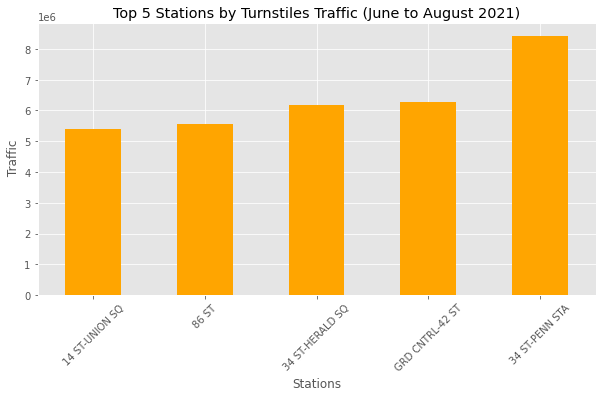

In [27]:
top_5 = station_totals.groupby(['STATION']).agg({'DAILY_TRAFFIC': sum}).sort_values(by = 'DAILY_TRAFFIC', ascending = False).head(5)
fig, ax = plt.subplots(figsize=(10, 5))
top_5.sort_values(by = 'DAILY_TRAFFIC',ascending=True).plot(kind='bar', color ='orange', ax=ax)
ax.set(title='Top 5 Stations by Turnstiles Traffic (June to August 2021)', xlabel='Stations', ylabel=' Traffic')
plt.xticks(rotation=45)
ax.legend().set_visible(False)

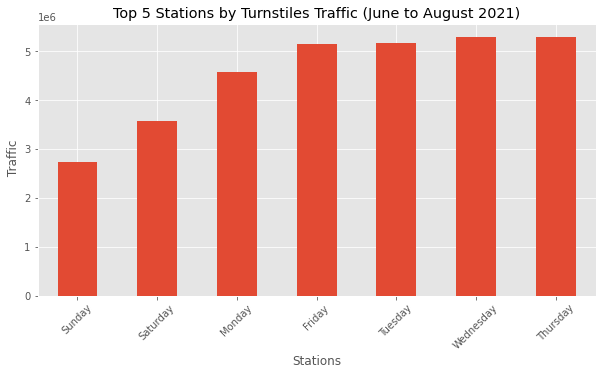

In [29]:
df = mask22.groupby(['DayOfWeek']).agg({'DAILY_TRAFFIC': sum}).sort_values(by = 'DAILY_TRAFFIC', ascending = False)
fig, ax = plt.subplots(figsize=(10, 5))
df.sort_values(by = 'DAILY_TRAFFIC',ascending=True).plot(kind='bar', ax=ax)
ax.set(title='Top 5 Stations by Turnstiles Traffic (June to August 2021)', xlabel='Stations', ylabel=' Traffic')
plt.xticks(rotation=45) 
ax.legend().set_visible(False)

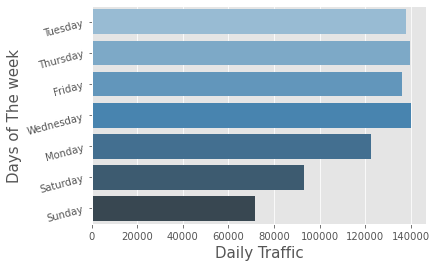

In [30]:
ax = sns.barplot(x="DAILY_TRAFFIC", y="DayOfWeek",data=f, palette="Blues_d", ci = None)
ax.set_yticklabels(ax.get_yticklabels(),rotation = 15);
ax.set_xlabel("Daily Traffic", fontsize = 15)
ax.set_ylabel("Days of The week", fontsize = 15);


In [32]:
top5 = mask22.groupby(['STATION']).agg({'DAILY_TRAFFIC': sum}).sort_values(by = 'DAILY_TRAFFIC', ascending = False).head(5)

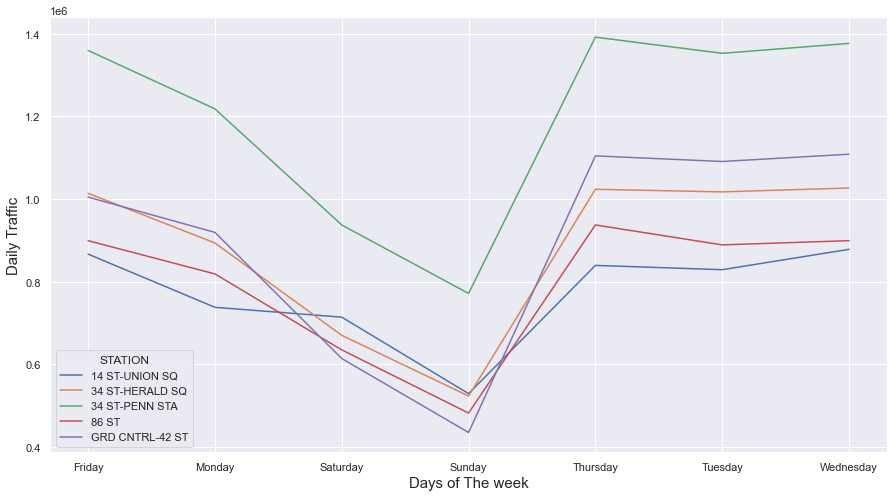

In [33]:
sns.set(rc = {'figure.figsize':(15,8)})
c= sns.lineplot(data=mask22, x="DayOfWeek", y="DAILY_TRAFFIC", hue="STATION")
c.set_ylabel("Daily Traffic", fontsize = 15)
c.set_xlabel("Days of The week", fontsize = 15);

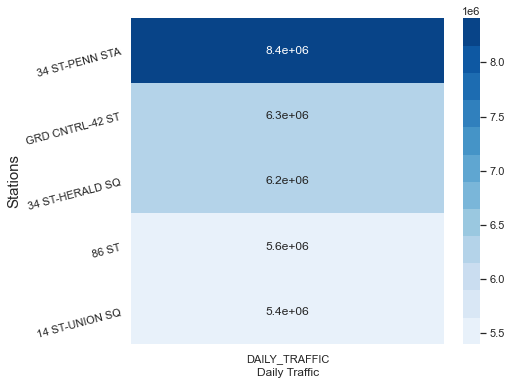

In [48]:
fig, ax = plt.subplots(figsize=(7, 6))
colormap = sns.color_palette("Blues",12)
v=sns.heatmap(top5, annot = True, cmap=colormap)
v.set_yticklabels(ax.get_yticklabels(),rotation = 15);
v.set_ylabel("Stations", fontsize = 15)
plt.xlabel('Daily Traffic')
plt.show()

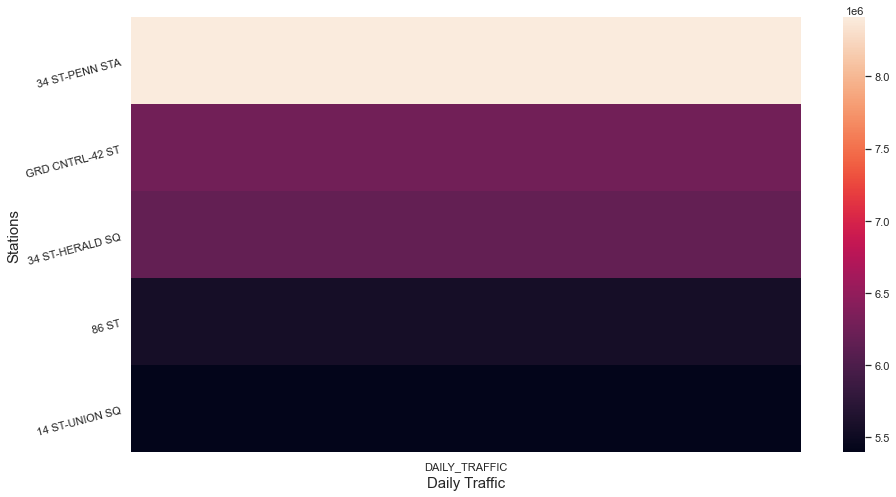

In [46]:
i = sns.heatmap(top5)
i.set_yticklabels(ax.get_yticklabels(),rotation = 15);
i.set_ylabel("Stations", fontsize = 15)
i.set_xlabel("Daily Traffic", fontsize = 15);

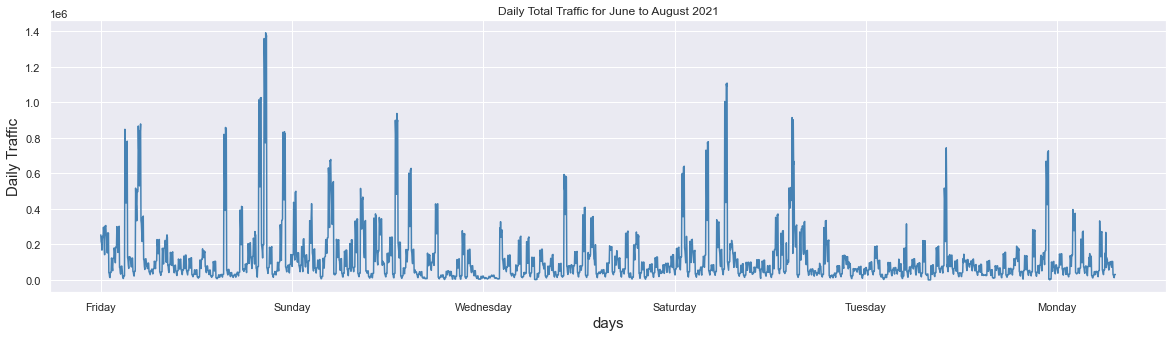

In [47]:
plt.figure(figsize=(20,5))
v= sd.set_index('DayOfWeek')['DAILY_TRAFFIC'].plot(color = 'steelblue')
plt.title('Daily Total Traffic for June to August 2021') 
v.set_ylabel("Daily Traffic", fontsize = 15)
v.set_xlabel("days", fontsize = 15);
plt.show()